In [150]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('survey_results.csv')

In [151]:
print(df.shape)
df.head()

(30010, 17)


,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
2,R00003,41,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250
3,R00004,33,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
4,R00005,23,M,Metro,Student,NaN,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100


<h1 align='center' style="color:#daa520">Cleaning Data<h1>

### 1. Check duplicated

In [152]:
# 1. Check duplicated
df.duplicated().sum()

10

In [153]:
df.drop_duplicates(keep='first', inplace=True)

In [154]:
df.duplicated().sum()

0

In [155]:
df.shape

(30000, 17)

### 2. Check outliers from age column

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 0 to 30009
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   respondent_id                   30000 non-null  object
 1   age                             30000 non-null  int64 
 2   gender                          30000 non-null  object
 3   zone                            30000 non-null  object
 4   occupation                      30000 non-null  object
 5   income_levels                   21939 non-null  object
 6   consume_frequency(weekly)       29992 non-null  object
 7   current_brand                   30000 non-null  object
 8   preferable_consumption_size     30000 non-null  object
 9   awareness_of_other_brands       30000 non-null  object
 10  reasons_for_choosing_brands     30000 non-null  object
 11  flavor_preference               30000 non-null  object
 12  purchase_channel                29990 non-null  obj

In [157]:
df.describe()

,age
count,30000.000000
mean,33.048167
std,13.438904
min,18.000000
25%,23.000000
50%,31.000000
75%,40.000000
max,604.000000


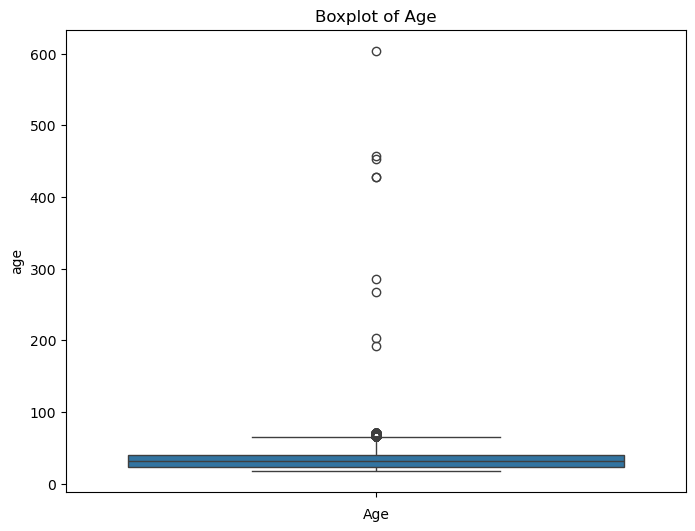

In [158]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='age')
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

In [159]:
print(df[df['age'] > 100].shape)
df[df['age'] > 100]


(9, 17)


,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
3099,R03098,453,M,Metro,Working Professional,26L - 35L,3-4 times,Established,Medium (500 ml),2 to 4,Brand Reputation,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
6262,R06260,428,M,Urban,Entrepreneur,16L - 25L,5-7 times,Established,Large (1 L),above 4,Quality,Exotic,Online,Simple,High (Very health-conscious),Social (eg. Parties),200-250
12403,R12398,604,M,Metro,Retired,<10L,0-2 times,Newcomer,Small (250 ml),2 to 4,Availability,Traditional,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150
22549,R22542,457,M,Metro,Working Professional,16L - 25L,3-4 times,Newcomer,Small (250 ml),2 to 4,Price,Traditional,Online,Premium,High (Very health-conscious),Casual (eg. At home),200-250
22918,R22911,267,F,Metro,Working Professional,16L - 25L,3-4 times,Established,Medium (500 ml),above 4,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
24958,R24950,285,M,Semi-Urban,Working Professional,> 35L,0-2 times,Newcomer,Small (250 ml),2 to 4,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",150-200
24960,R24952,192,F,Urban,Student,NaN,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Low (Not very concerned),"Active (eg. Sports, gym)",50-100
25105,R25096,203,M,Metro,Working Professional,16L - 25L,0-2 times,Established,Small (250 ml),2 to 4,Brand Reputation,Exotic,Retail Store,Premium,High (Very health-conscious),"Active (eg. Sports, gym)",150-200
28770,R28761,428,F,Rural,Working Professional,26L - 35L,0-2 times,Established,Small (250 ml),2 to 4,Brand Reputation,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),150-200


In [160]:
df[df['age'] > 100]['age'].max()

604

In [161]:
# Drop age which greater than 100
df = df[df['age'] < 100]

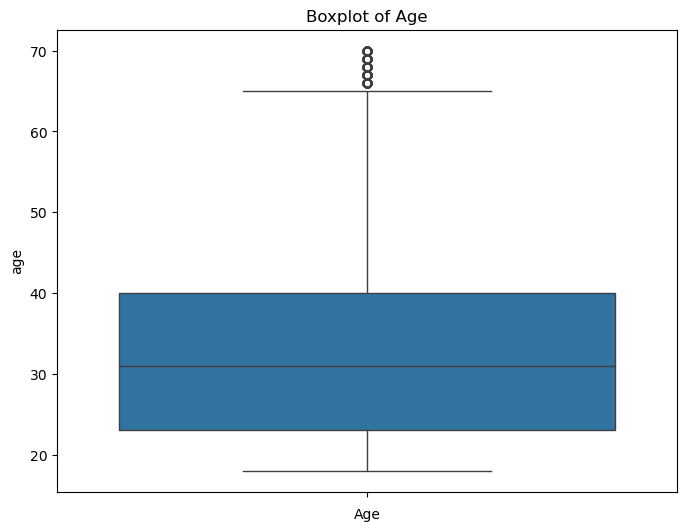

In [162]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='age')
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

In [163]:
df.shape

(29991, 17)

### 3. How many null values are present in the consume_frequency(weekly) column? What is the mode value used to fill these null values?


In [164]:
df.head(3)

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
2,R00003,41,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250


In [165]:
# Null value in consume_frequency
df['consume_frequency(weekly)'].isna().sum()

8

In [166]:
df['consume_frequency(weekly)'].value_counts()

consume_frequency(weekly)
3-4 times    11786
5-7 times     9774
0-2 times     8423
Name: count, dtype: int64

In [167]:
df['consume_frequency(weekly)'].mode()

0    3-4 times
Name: consume_frequency(weekly), dtype: object

* We will use mode 3-4 times to fill N/A values for consume_frequency

In [168]:
df['consume_frequency(weekly)']=df['consume_frequency(weekly)'].fillna('3-4 times')

In [169]:
df['consume_frequency(weekly)'].value_counts()

consume_frequency(weekly)
3-4 times    11794
5-7 times     9774
0-2 times     8423
Name: count, dtype: int64

In [170]:
df['consume_frequency(weekly)'].isna().sum()

0

In [171]:
df.shape

(29991, 17)

In [172]:
df.isnull().sum()

respondent_id                        0
age                                  0
gender                               0
zone                                 0
occupation                           0
income_levels                     8060
consume_frequency(weekly)            0
current_brand                        0
preferable_consumption_size          0
awareness_of_other_brands            0
reasons_for_choosing_brands          0
flavor_preference                    0
purchase_channel                    10
packaging_preference                 0
health_concerns                      0
typical_consumption_situations       0
price_range                          0
dtype: int64

# Check N/A income_levels

In [173]:
df[df['income_levels'].isna()]

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
4,R00005,23,M,Metro,Student,NaN,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100
5,R00006,22,F,Urban,Student,NaN,5-7 times,Established,Large (1 L),2 to 4,Price,Traditional,Online,Simple,Low (Not very concerned),"Active (eg. Sports, gym)",100-150
11,R00012,23,F,Urban,Student,NaN,0-2 times,Established,Small (250 ml),0 to 1,Price,Exotic,Retail Store,Premium,Low (Not very concerned),Social (eg. Parties),50-100
14,R00015,22,M,Metro,Student,NaN,3-4 times,Established,Small (250 ml),0 to 1,Price,Traditional,Retail Store,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
20,R00021,23,M,Semi-Urban,Student,NaN,3-4 times,Newcomer,Large (1 L),0 to 1,Availability,Traditional,Retail Store,Premium,Low (Not very concerned),"Active (eg. Sports, gym)",50-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,R29986,24,F,Metro,Student,NaN,5-7 times,Newcomer,Small (250 ml),0 to 1,Price,Traditional,Online,Premium,Low (Not very concerned),Social (eg. Parties),100-150
29996,R29987,22,M,Urban,Student,NaN,0-2 times,Established,Small (250 ml),0 to 1,Price,Exotic,Online,Premium,Low (Not very concerned),Social (eg. Parties),50-100
29999,R29990,23,F,Metro,Student,NaN,3-4 times,Established,Small (250 ml),2 to 4,Price,Exotic,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
30002,R29993,18,M,Metro,Student,NaN,0-2 times,Established,Medium (500 ml),2 to 4,Availability,Exotic,Online,Premium,Low (Not very concerned),Social (eg. Parties),100-150


In [174]:
df['income_levels'].value_counts()

income_levels
16L - 25L    5897
10L - 15L    5251
<10L         4661
26L - 35L    3872
> 35L        2250
Name: count, dtype: int64

In [175]:
df['income_levels'].fillna('Not Reported', inplace=True)

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_15896\3822980836.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['income_levels'].fillna('Not Reported', inplace=True)


In [176]:
df.isnull().sum()

respondent_id                      0
age                                0
gender                             0
zone                               0
occupation                         0
income_levels                      0
consume_frequency(weekly)          0
current_brand                      0
preferable_consumption_size        0
awareness_of_other_brands          0
reasons_for_choosing_brands        0
flavor_preference                  0
purchase_channel                  10
packaging_preference               0
health_concerns                    0
typical_consumption_situations     0
price_range                        0
dtype: int64

In [177]:
#Check purchase_channel
df['purchase_channel'].value_counts()

purchase_channel
Online          16562
Retail Store    13419
Name: count, dtype: int64

In [178]:
df['purchase_channel'].mode()

0    Online
Name: purchase_channel, dtype: object

In [179]:
df['purchase_channel'] =df['purchase_channel'].fillna('Online')

In [180]:
df.isnull().sum()

respondent_id                     0
age                               0
gender                            0
zone                              0
occupation                        0
income_levels                     0
consume_frequency(weekly)         0
current_brand                     0
preferable_consumption_size       0
awareness_of_other_brands         0
reasons_for_choosing_brands       0
flavor_preference                 0
purchase_channel                  0
packaging_preference              0
health_concerns                   0
typical_consumption_situations    0
price_range                       0
dtype: int64

In [181]:
df.shape

(29991, 17)

### 4. Correct spelling

In [182]:
df.columns

Index(['respondent_id', 'age', 'gender', 'zone', 'occupation', 'income_levels',
       'consume_frequency(weekly)', 'current_brand',
       'preferable_consumption_size', 'awareness_of_other_brands',
       'reasons_for_choosing_brands', 'flavor_preference', 'purchase_channel',
       'packaging_preference', 'health_concerns',
       'typical_consumption_situations', 'price_range'],
      dtype='object')

In [183]:
for col in df.select_dtypes('object').columns:
    print(f"{col} --> {df[col].unique()}")

respondent_id --> ['R00001' 'R00002' 'R00003' ... 'R29998' 'R29999' 'R30000']
gender --> ['M' 'F']
zone --> ['Urban' 'Metro' 'Rural' 'Semi-Urban' 'Metor' 'urbna']
occupation --> ['Working Professional' 'Student' 'Entrepreneur' 'Retired']
income_levels --> ['<10L' '> 35L' '16L - 25L' 'Not Reported' '10L - 15L' '26L - 35L']
consume_frequency(weekly) --> ['3-4 times' '5-7 times' '0-2 times']
current_brand --> ['Newcomer' 'Established' 'newcomer' 'Establishd']
preferable_consumption_size --> ['Medium (500 ml)' 'Large (1 L)' 'Small (250 ml)']
awareness_of_other_brands --> ['0 to 1' '2 to 4' 'above 4']
reasons_for_choosing_brands --> ['Price' 'Quality' 'Availability' 'Brand Reputation']
flavor_preference --> ['Traditional' 'Exotic']
purchase_channel --> ['Online' 'Retail Store']
packaging_preference --> ['Simple' 'Premium' 'Eco-Friendly']
health_concerns --> ['Medium (Moderately health-conscious)' 'Low (Not very concerned)'
 'High (Very health-conscious)']
typical_consumption_situations --> 

In [184]:
df['zone'] = df['zone'].replace('urbna', 'Urban')
df['zone'] = df['zone'].replace('Metor', 'Metro')
#df['current_brand'] = df['current_brand'].replace('newcomer', 'Newcomer')
df['current_brand'] = df['current_brand'].replace('Establishd', 'Established')


In [185]:
df['current_brand'].unique()

array(['Newcomer', 'Established', 'newcomer'], dtype=object)

In [186]:
print(df[df['zone'] == 'Metor'].shape)
df[df['zone'] == 'Metor']

(0, 17)


,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range


In [187]:
df['zone'] = df['zone'].replace('Metor', 'Metro')

In [188]:
df['zone'].unique()

array(['Urban', 'Metro', 'Rural', 'Semi-Urban'], dtype=object)

<h1 align = 'center' style="color:#daa520">Feature Engineering<h1>

* Step 1:
* Categorize Age into Age Groups
* Objective: Create a new column `age_group` by categorizing the existing `age`
column into specific age ranges.
* ● Categorize ages into the following groups:
* ○ 18-25 ○ 26-35 ○ 36-45 ○ 46-55 ○ 56-70 ○ 70+
* ● Ensure that each age in the dataset is mapped to one of these age groups.
* ● After that, remove the original `age` column from the dataset.

In [189]:
df.head()

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
2,R00003,41,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250
3,R00004,33,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
4,R00005,23,M,Metro,Student,Not Reported,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100


In [190]:
def categorize_age_group(age):
    if 18 <= age <= 25:
        return '18-25'
    elif 26 <= age <= 35:
        return '26-35'
    elif 36 <= age <= 45:
        return '36-45'
    elif 46 <= age <= 55:
        return '46-55'
    elif 56 <= age <= 70:
        return '56-70'
    elif age > 70:
        return '70+'
    else:
        return None

In [191]:
df['age_group'] = df['age'].apply(categorize_age_group)
df.drop('age', axis=1, inplace=True)
df.head()

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group
0,R00001,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35
1,R00002,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55
2,R00003,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45
3,R00004,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35
4,R00005,M,Metro,Student,Not Reported,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25


### Step 2: Create `cf_ab_score` (Consume Frequency and Awareness Brand Score)
 <p>Objective: Create a new column `cf_ab_score` by combining the information from `consume_frequency(weekly)` and `awareness_of_other_brands` columns.
 </p>
 <li>
Use the following mappings for consume_frequency(weekly):
 <ul>○ "0-2 times" → 1</ul>
 <ul>○ "3-4 times" → 2</ul>
 <ul>○ "5-7 times" → 3</ul>
 </li>
 <li>Use the following mappings for awareness_of_other_brands:
 <ul> ○ "0to1"→1</ul>
  <ul>○ "2to4"→2</ul>
  <ul>○ "above 4" → 3</ul>
 </li>
 <li>
 Calculate cf_ab_score using the following formula:
  <ul>cf_ab_score = (consume_frequency) / (consume_frequency + awareness_of_other_brands)</ul>
</li>

In [192]:
df['consume_frequency(weekly)'].unique()

array(['3-4 times', '5-7 times', '0-2 times'], dtype=object)

In [193]:
df['awareness_of_other_brands'].unique()

array(['0 to 1', '2 to 4', 'above 4'], dtype=object)

In [194]:
df['consume_frequency(weekly)'] = df['consume_frequency(weekly)'].map({'0-2 times': 1, '3-4 times': 2, '5-7 times': 3})
df['awareness_of_other_brands'] = df['awareness_of_other_brands'].map({'0 to 1' : 1, '2 to 4' : 2, 'above 4' : 3})
df.head()

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group
0,R00001,M,Urban,Working Professional,<10L,2,Newcomer,Medium (500 ml),1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35
1,R00002,F,Metro,Working Professional,> 35L,3,Established,Medium (500 ml),2,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55
2,R00003,F,Rural,Working Professional,> 35L,2,Newcomer,Medium (500 ml),2,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45
3,R00004,F,Urban,Working Professional,16L - 25L,3,Newcomer,Medium (500 ml),1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35
4,R00005,M,Metro,Student,Not Reported,2,Established,Medium (500 ml),1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25


In [195]:
df['cf_ab_score'] = (df['consume_frequency(weekly)'] / (df['consume_frequency(weekly)'] + df['awareness_of_other_brands'])).round(2)
df.head()

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score
0,R00001,M,Urban,Working Professional,<10L,2,Newcomer,Medium (500 ml),1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.67
1,R00002,F,Metro,Working Professional,> 35L,3,Established,Medium (500 ml),2,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.60
2,R00003,F,Rural,Working Professional,> 35L,2,Newcomer,Medium (500 ml),2,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45,0.50
3,R00004,F,Urban,Working Professional,16L - 25L,3,Newcomer,Medium (500 ml),1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35,0.75
4,R00005,M,Metro,Student,Not Reported,2,Established,Medium (500 ml),1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25,0.67


In [196]:
df['cf_ab_score'].max()

0.75

# Step 3: Create Zone Affluence Score (ZAS)
Objective: Calculate the `zas_score` using a combination of the `zone` and
 `income_levels` columns.
<li>Use the following mappings for the zone column:
<ul>"Urban" → 3</ul>
<ul>"Metro" → 4</ul>
<ul>"Rural" → 1</ul>
<ul>"Semi-Urban" → 2</ul>
</li> 
<li>Use the following mappings for the income_levels column:
<ul>"<10L" → 1</ul>
<ul>"10L-15L"→2</ul>
<ul>"16L-25L"→3</ul>
<ul>"26L-35L"→4</ul>
<ul>">35L"→5</ul>
<ul>"Not Reported" → 0</ul>
</li>
<li>Calculate the zas_score using the following formula:
<ul>zas_score = zone_score * income_score</ul>
</li>

In [197]:
df['zone'].unique()

array(['Urban', 'Metro', 'Rural', 'Semi-Urban'], dtype=object)

In [198]:
df['income_levels'].unique()

array(['<10L', '> 35L', '16L - 25L', 'Not Reported', '10L - 15L',
       '26L - 35L'], dtype=object)

In [199]:
def strip_income_leve(text):
    return text.replace(' ', '')

strip_income_leve('> 35L')

'>35L'

In [200]:
df['income_levels'] = df['income_levels'].apply(strip_income_leve)

In [201]:
df['income_levels'].unique()

array(['<10L', '>35L', '16L-25L', 'NotReported', '10L-15L', '26L-35L'],
      dtype=object)

In [202]:
df['zone'] = df['zone'].map({"Rural" :1, "Urban" :3, "Semi-Urban" :2, "Metro" :4})
df['income_levels'] = df['income_levels'].map({"<10L": 1, "10L-15L":2, "16L-25L":3, "26L-35L":4, ">35L":5, "NotReported":0})
df['zas_score'] = df['zone'] * df['income_levels']
df.head()

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score
0,R00001,M,3,Working Professional,1,2,Newcomer,Medium (500 ml),1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.67,3
1,R00002,F,4,Working Professional,5,3,Established,Medium (500 ml),2,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.60,20
2,R00003,F,1,Working Professional,5,2,Newcomer,Medium (500 ml),2,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45,0.50,5
3,R00004,F,3,Working Professional,3,3,Newcomer,Medium (500 ml),1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35,0.75,9
4,R00005,M,4,Student,0,2,Established,Medium (500 ml),1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25,0.67,0


In [203]:
df['zas_score'].nunique()

14

### Step 4: Brand Switching Indicator (BSI)
Objective: Create a binary indicator column `bsi` that identifies if a respondent is likely to switch brands.
<li>Check if the respondent’s current_brand is not "Established".
<li>Also check if the reasons_for_choosing_brands are either "Price" or
"Quality".
<li>If both conditions are true, assign a value of 1 to indicate potential for brand
switching. Otherwise, assign 0.

In [204]:
df['bsi'] = ((df['current_brand'] != 'Established') & (df['reasons_for_choosing_brands'].isin(['Price', 'Quality']))).astype(int)
df.sample(25)

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score,bsi
8986,R08982,M,4,Entrepreneur,5,3,Established,Large (1 L),3,Brand Reputation,Traditional,Online,Premium,Low (Not very concerned),Casual (eg. At home),200-250,36-45,0.50,20,0
12931,R12926,F,3,Student,0,1,Established,Small (250 ml),1,Price,Exotic,Online,Eco-Friendly,High (Very health-conscious),Social (eg. Parties),50-100,18-25,0.50,0,0
24372,R24364,M,3,Student,0,2,Newcomer,Small (250 ml),1,Availability,Exotic,Online,Eco-Friendly,Low (Not very concerned),Casual (eg. At home),50-100,26-35,0.67,0,0
14516,R14511,M,4,Working Professional,3,3,Newcomer,Large (1 L),1,Brand Reputation,Traditional,Online,Eco-Friendly,Medium (Moderately health-conscious),Casual (eg. At home),150-200,26-35,0.75,12,0
1758,R01759,F,3,Retired,2,2,Newcomer,Medium (500 ml),1,Price,Traditional,Retail Store,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150,56-70,0.67,6,1
21252,R21246,M,3,Entrepreneur,2,2,Established,Small (250 ml),2,Price,Exotic,Retail Store,Eco-Friendly,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",150-200,26-35,0.50,6,0
10363,R10359,M,4,Student,0,2,Newcomer,Large (1 L),1,Price,Traditional,Retail Store,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25,0.67,0,1
4036,R04035,M,3,Student,0,3,Newcomer,Large (1 L),2,Price,Exotic,Online,Simple,High (Very health-conscious),"Active (eg. Sports, gym)",150-200,18-25,0.60,0,1
24621,R24613,F,2,Retired,1,1,Newcomer,Medium (500 ml),1,Price,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",100-150,56-70,0.50,2,1
18391,R18386,M,2,Student,0,1,Established,Small (250 ml),2,Price,Traditional,Retail Store,Simple,Low (Not very concerned),Casual (eg. At home),50-100,18-25,0.33,0,0


In [205]:
df['current_brand'].dtype, df['reasons_for_choosing_brands'].dtype

(dtype('O'), dtype('O'))

In [206]:
df['current_brand'].isna().sum(), df['reasons_for_choosing_brands'].isna().sum()

(0, 0)

In [207]:
df['bsi'].isna().sum()

0

### Final Cleaning Step:
#### Removing Logical Outliers:

In [208]:
df.head()

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score,bsi
0,R00001,M,3,Working Professional,1,2,Newcomer,Medium (500 ml),1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.67,3,1
1,R00002,F,4,Working Professional,5,3,Established,Medium (500 ml),2,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.60,20,0
2,R00003,F,1,Working Professional,5,2,Newcomer,Medium (500 ml),2,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45,0.50,5,0
3,R00004,F,3,Working Professional,3,3,Newcomer,Medium (500 ml),1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35,0.75,9,0
4,R00005,M,4,Student,0,2,Established,Medium (500 ml),1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25,0.67,0,0


In [209]:
df.groupby('age_group')['occupation'].value_counts()

age_group  occupation          
18-25      Student                 7328
           Working Professional    2605
           Entrepreneur             535
26-35      Working Professional    6570
           Entrepreneur            1826
           Student                  697
36-45      Working Professional    4353
           Entrepreneur            1619
46-55      Working Professional    2167
           Entrepreneur             799
56-70      Retired                 1130
           Entrepreneur             221
           Working Professional     106
           Student                   35
Name: count, dtype: int64

In [210]:
df[(df['age_group'] == '18-25') & (df['occupation']=='Entrepreneur')]

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score,bsi
25,R00026,F,4,Entrepreneur,4,3,Established,Large (1 L),3,Quality,Exotic,Online,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,18-25,0.50,16,0
58,R00059,F,3,Entrepreneur,3,2,Established,Medium (500 ml),1,Quality,Traditional,Online,Eco-Friendly,Low (Not very concerned),Social (eg. Parties),150-200,18-25,0.67,9,0
81,R00082,M,4,Entrepreneur,2,2,Established,Medium (500 ml),3,Price,Traditional,Retail Store,Premium,High (Very health-conscious),"Active (eg. Sports, gym)",200-250,18-25,0.40,8,0
113,R00114,F,3,Entrepreneur,3,3,Established,Medium (500 ml),3,Quality,Traditional,Retail Store,Premium,Low (Not very concerned),"Active (eg. Sports, gym)",200-250,18-25,0.50,9,0
159,R00160,M,1,Entrepreneur,2,1,Newcomer,Small (250 ml),3,Price,Traditional,Online,Simple,Low (Not very concerned),Casual (eg. At home),100-150,18-25,0.25,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29777,R29768,M,3,Entrepreneur,2,1,Newcomer,Medium (500 ml),1,Price,Exotic,Online,Simple,Medium (Moderately health-conscious),Social (eg. Parties),100-150,18-25,0.50,6,1
29852,R29843,M,2,Entrepreneur,3,3,Established,Medium (500 ml),1,Brand Reputation,Traditional,Retail Store,Eco-Friendly,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,18-25,0.75,6,0
29894,R29885,F,3,Entrepreneur,3,3,Newcomer,Medium (500 ml),2,Brand Reputation,Traditional,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),200-250,18-25,0.60,9,0
29968,R29959,M,4,Entrepreneur,1,1,Established,Small (250 ml),1,Price,Traditional,Retail Store,Simple,High (Very health-conscious),Casual (eg. At home),100-150,18-25,0.50,4,0


In [211]:
df = df[~((df['age_group'] == '56-70') & (df['occupation']=='Student'))]
print(df.shape)
df.head()

(29956, 20)


,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score,bsi
0,R00001,M,3,Working Professional,1,2,Newcomer,Medium (500 ml),1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.67,3,1
1,R00002,F,4,Working Professional,5,3,Established,Medium (500 ml),2,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.60,20,0
2,R00003,F,1,Working Professional,5,2,Newcomer,Medium (500 ml),2,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45,0.50,5,0
3,R00004,F,3,Working Professional,3,3,Newcomer,Medium (500 ml),1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35,0.75,9,0
4,R00005,M,4,Student,0,2,Established,Medium (500 ml),1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25,0.67,0,0


In [212]:
df.groupby('age_group')['occupation'].value_counts()

age_group  occupation          
18-25      Student                 7328
           Working Professional    2605
           Entrepreneur             535
26-35      Working Professional    6570
           Entrepreneur            1826
           Student                  697
36-45      Working Professional    4353
           Entrepreneur            1619
46-55      Working Professional    2167
           Entrepreneur             799
56-70      Retired                 1130
           Entrepreneur             221
           Working Professional     106
Name: count, dtype: int64

In [213]:
df.shape

(29956, 20)

In [214]:
df['bsi'].value_counts()

bsi
0    20796
1     9160
Name: count, dtype: int64

<h1 align='center' style='color:#daa520'>Modeling Instructions</h1>

### 1. Prepare Features and Target Variables:

In [215]:
# Prepare Feature Matrix (X) and Target Variable (y)\n
X = df.drop(['respondent_id', 'price_range'], axis=1)
y = df['price_range']
print("Shape of Feature Matrix (X):", X.shape)
print("Shape of Target Variable (y):", y.shape)

Shape of Feature Matrix (X): (29956, 18)
Shape of Target Variable (y): (29956,)


### 2. Data Splitting:

In [216]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (22467, 18)
X_test shape: (7489, 18)
y_train shape: (22467,)
y_test shape: (7489,)


### 3. Feature Encoding

#### Use Label Encoding for the following Columns:
age_groups, income_levels. health_concerns, consume_frequency(weekly), and preferable_consumption_size

In [217]:
from sklearn.preprocessing import LabelEncoder
# Columns for Label Encoding
label_encode_cols = ['age_group', 'income_levels', 'health_concerns', 'consume_frequency(weekly)', 'preferable_consumption_size', 'price_range']
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Apply Label Encoding to target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Apply Label Encoding to specified feature columns in training set
for col in label_encode_cols:
    if col != 'price_range': # Avoid encoding price_range here, it's target
        X_train[col] = label_encoder.fit_transform(X_train[col])
        X_test[col] = label_encoder.transform(X_test[col])

print("Label Encoding completed for specified columns.")

Label Encoding completed for specified columns.


#### Apply One-Hot-Encoding to all remaining categorical columns

In [218]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Identify categorical columns for One-Hot Encoding (excluding already Label Encoded and target)
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()

# Initialize OneHotEncoder with handle_unknown='ignore'
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Apply One-Hot Encoding to categorical columns in training set
X_train_encoded = onehot_encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = onehot_encoder.transform(X_test[categorical_cols])

# Create DataFrame from encoded features
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=onehot_encoder.get_feature_names_out(categorical_cols), index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=onehot_encoder.get_feature_names_out(categorical_cols), index=X_test.index)

# Drop original categorical columns and concatenate encoded features
X_train = X_train.drop(categorical_cols, axis=1)
X_test = X_test.drop(categorical_cols, axis=1)

X_train = pd.concat([X_train, X_train_encoded_df], axis=1)
X_test = pd.concat([X_test, X_test_encoded_df], axis=1)

print("One-Hot Encoding completed for remaining categorical columns.")
print("Shape of encoded X_train:", X_train.shape)
print("Shape of encoded X_test:", X_test.shape)

One-Hot Encoding completed for remaining categorical columns.
Shape of encoded X_train: (22467, 33)
Shape of encoded X_test: (7489, 33)


### 4. Model Selection

In [219]:
import dagshub
dagshub.init(repo_owner='gauravanilwankhede2002', repo_name='my-first-repo', mlflow=True)

Initialized MLflow to track repo "gauravanilwankhede2002/my-first-repo"

Repository gauravanilwankhede2002/my-first-repo initialized!

In [222]:
import mlflow
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd


# Enable autologging
mlflow.autolog()

# Clean feature names to be compatible with LightGBM
X_train.columns = ["".join(c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]
X_test.columns = ["".join(c if c.isalnum() else "_" for c in str(x)) for x in X_test.columns]

# Initialize models dictionary to store different classifiers
models = {
    'Gaussian Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(random_state=42)
}

# Dictionary to store model performance metrics
model_performance = {}

# Loop through each model to train and evaluate
for name, model in models.items():
    print(f'\nTraining and evaluating {name}...')
    with mlflow.start_run(run_name=name) as run:  # Added run_name
        # Log parameters (manual logging for specific models)
        if name == 'Logistic Regression':
            mlflow.log_param("max_iter", 1000)
            mlflow.log_param("random_state", 42)
        elif name == 'XGBoost':
            mlflow.log_param("random_state", 42)
            mlflow.log_param("use_label_encoder", False)
            mlflow.log_param("eval_metric", 'logloss')
        else:
            mlflow.log_param("random_state", 42)

        # Add a tag for the model type
        mlflow.set_tag("model_type", name)

        # Train the model on the training data
        model.fit(X_train, y_train_encoded)

        # Make predictions on the test data
        y_pred = model.predict(X_test)

        # Evaluate model performance
        accuracy = accuracy_score(y_test_encoded, y_pred)
        class_report = classification_report(y_test_encoded, y_pred)

        # Store accuracy in model_performance dictionary
        model_performance[name] = accuracy

        # Log metrics (manual logging for accuracy)
        mlflow.log_metric("accuracy", accuracy)

        # Log classification report metrics (manual logging)
        report_dict = classification_report(y_test_encoded, y_pred, output_dict=True)
        for label, metrics in report_dict.items():
            if isinstance(metrics, dict):
                for metric_name, metric_value in metrics.items():
                    mlflow.log_metric(f"{name}_{label}_{metric_name}", metric_value)

        # Log the model (autologging will also log the model)
        mlflow.sklearn.log_model(model, artifact_path="model")

        # Print accuracy and classification report for each model
        print(f'{name} - Accuracy: {accuracy:.4f}')
        print(f'{name} - Classification Report:\n{class_report}')

print('\nModel Comparison based on Accuracy:')

# Iterate through the model_performance dictionary to compare accuracies
for model, accuracy in model_performance.items():
    print(f'{model}: Accuracy = {accuracy:.4f}')

# Identify the best performing model based on accuracy
best_model_name = max(model_performance, key=model_performance.get)
best_accuracy = model_performance[best_model_name]

# Print the best performing model and its accuracy
print(f'\nBest Performing Model: {best_model_name} with Accuracy = {best_accuracy:.4f}')

2025/01/25 14:33:57 INFO mlflow.tracking.fluent: Autologging successfully enabled for lightgbm.
2025/01/25 14:33:57 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/01/25 14:33:57 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/01/25 14:33:57 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.



Training and evaluating Gaussian Naive Bayes...


MlflowException: API request to endpoint /api/2.0/mlflow/runs/create failed with error code 404 != 200. Response body: '<!DOCTYPE html>
<html lang="en-US">
  <head data-suburl="">
    <meta http-equiv="Content-Type" content="text/html; charset=UTF-8"/>
    <meta http-equiv="X-UA-Compatible" content="IE=edge"/>
    
    
      <meta name="viewport" content="width=device-width, initial-scale=1"/>
    
    <meta name="referrer" content="no-referrer"/>
    <meta name="_csrf" content="8NkB_R5L33IUfK854haZSWTnmCo6MTczNzc5NTc4NjgzMTQyMDczNg"/>
    <meta name="_suburl" content=""/>
    <meta name="_appversion" content="7e93152b02a11856d9a165aed4f4539a540caedb" />
    <meta name="_bareRepo" content=""/>

    
    
  <script>(function(w, d, s, l, i) {
      w[l] = w[l] || [];
      w[l].push({
        'gtm.start':
          new Date().getTime(), event: 'gtm.js'
      });
      var f = d.getElementsByTagName(s)[0],
        j = d.createElement(s),
        dl = l != 'dataLayer' ? '&l=' + l : '';
      j.async = true;
      j.src =
        'https://www.googletagmanager.com/gtm.js?id=' + i + dl;
      f.parentNode.insertBefore(j, f);
    })(window, document, 'script', 'dataLayer', 'GTM-PGHTMDN');</script>

    

    
    
      
    
    
  
    <title>Page Not Found · DAGsHub</title>
    <meta name="description"
          content="DagsHub is where people build machine learning projects. DagsHub helps AI teams build better models and manage their data effectively."/>
  
  
  <meta property="og:url" content="https://dagshub.com/"/>
  <meta property="og:type" content="website"/>
  <meta property="og:site_name" content="DagsHub">
  <meta property="og:title" content="DagsHub: The Home for Machine Learning Collaboration">
  <meta property="og:description"
        content="DagsHub is where people build machine learning projects. DagsHub helps AI teams build better models and manage their data effectively.">
  <meta property="og:image" content="https://dagshub.com/img/open_graph/dagshub-logo.jpg"/>
  <meta property="og:image:type" content="image/png">
  <meta property="og:image:width" content="1200">
  <meta property="og:image:height" content="630">
  
  <meta property="twitter:site" content="@TheRealDagsHub">
  <meta property="twitter:creator" content="@TheRealDagsHub">
  <meta property="twitter:card" content="summary_large_image">
  <meta property="twitter:title" content="DagsHub: The Home for Machine Learning Collaboration">
  <meta property="twitter:description"
        content="DagsHub is where people build machine learning projects. DagsHub helps AI teams build better models and manage their data effectively.">
  <meta property="twitter:image:src" content="https://dagshub.com/img/open_graph/dagshub-logo.jpg">
  <meta property="twitter:image:width" content="1200">
  <meta property="twitter:image:height" content="630">

  <script type="application/ld+json">
    {
        "@context": "http://schema.org",
        "@type": "WebSite",
        "name": "DagsHub",
        "url": "https://dagshub.com/",
        "sameAs": [
            "https://www.facebook.com/DagsHub/",
            "https://twitter.com/TheRealDagsHub/",
            "https://linkedin.com/company/dagshub/"
        ],
        "potentialAction": {
        "@type": "SearchAction",
        "description": "Search for data science projects on DagsHub.",
        "target": "https://dagshub.com/explore/repos?q={search_term}",
        "query-input": "required name=search_term"
        }
    }
  </script>


    

    <link rel="shortcut icon" href="/img/favicon-black.svg"/>

    <script src="/js/jquery-3.6.0.min.js"></script>
    
  <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/5.15.3/css/all.css"
        integrity="sha512-3icgkoIO5qm2D4bGSUkPqeQ96LS8+ukJC7Eqhl1H5B2OJMEnFqLmNDxXVmtV/eq5M65tTDkUYS/Q0P4gvZv+yA=="
        crossorigin="anonymous"
        referrerpolicy="no-referrer" />


    <link rel="stylesheet" href="/assets/octicons-4.3.0/octicons.min.css">

    
    

    

    

    

    

    

    

    

    
    
    <link rel="preload" href="/css/themes/default/assets/fonts/brand-icons.woff2" as="font"
          type="font/woff2" crossorigin/>
    <link rel="preload" href="/css/themes/default/assets/fonts/icons.woff2" as="font" type="font/woff2"
          crossorigin/>
    <link rel="preload" href="/assets/fontawesome-5.15.3/webfonts/fa-solid-900.woff2" as="font"
          type="font/woff2" crossorigin/>

    
    <link rel="stylesheet" href="/css/semantic-2.4.2.min.css">

    
    <link rel="stylesheet" href="/css/build/dagshub.css?v=7e93152b02a11856d9a165aed4f4539a540caedb">
    <link rel="stylesheet" href="/css/gogs.css?v=7e93152b02a11856d9a165aed4f4539a540caedb">

    
    
    <link rel="preconnect" href="https://fonts.googleapis.com">
    <link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
    <link href="https://fonts.googleapis.com/css?family=Comfortaa|Lato:300,400,700,900|Jaldi|Open+Sans&display=swap" rel="stylesheet">
    

    <noscript>
      <style>
        .dropdown:hover > .menu {
          display: block;
        }

        .ui.secondary.menu .dropdown.item > .menu {
          margin-top: 0;
        }
      </style>
    </noscript>
    <script src="/js/semantic-2.4.2.min.js"></script>

    
    
      <link rel="stylesheet" href="/css/build/static_dagshub.css?v=7e93152b02a11856d9a165aed4f4539a540caedb">
      
      <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700;900&display=swap" rel="stylesheet">
      <link href='https://fonts.googleapis.com/css?family=Fira Code:wght@300;400;500;600;700;900' rel='stylesheet'>
      
    

    <meta name="theme-color" content="#103037">

    
  <script src="https://www.google.com/recaptcha/api.js" async defer></script>



    
  </head>
  <body>

    



  <noscript>
    <iframe src="https://www.googletagmanager.com/ns.html?id=GTM-PGHTMDN"
            height="0" width="0" style="display:none;visibility:hidden"></iframe>
  </noscript>




<div class="ui tiny modal" id="contact-modal">
  <i class="close icon"></i>
  <div class="header">
    Contact us
  </div>
  <form id="contact-form" class="ui form content" action="contact_form" method="post">
    <input type="hidden" name="_csrf" value="8NkB_R5L33IUfK854haZSWTnmCo6MTczNzc5NTc4NjgzMTQyMDczNg">
    <div class="required field">
      <label for="user_name">Your email address</label>
      <input name="email" type="email" value=""
             placeholder="tony@stark-industries.com" required>
    </div>
    <div class="required field">
      <label for="subject">Subject</label>
      <input name="subject" value="Hi DagsHub, let's talk" placeholder="What would you like to talk about?" required>
    </div>
    <div class="required field">
      <textarea class="autosize" name="body" rows="7" ></textarea>
    </div>
    
      <script type="text/javascript">
        var myRecaptchaListeners = {
          callAllListeners: function(listeners) {
            return () => listeners.forEach((f) => f());
          },
          successListeners: [],
          expireListeners: [],
        };
        contactFormCaptchaCallback = myRecaptchaListeners.callAllListeners(myRecaptchaListeners.successListeners);
        contactFormCaptchaExpired = myRecaptchaListeners.callAllListeners(myRecaptchaListeners.expireListeners);
      </script>
      <div class="g-recaptcha field"
           data-sitekey="6Lf0Z7gUAAAAAKCsW1V-PqN58BcBNAUxe-oIU3nw"
           data-callback="contactFormCaptchaCallback"
           data-expired-callback="contactFormCaptchaExpired"></div>
    
    <input type="hidden" name="page"/>
    <input type="hidden" name="referring_page"/>
    <input type="hidden" name="referrer"/>
    <button class="ui positive center aligned labeled icon button" id="send-contact-request-btn">
      Send
      <i class="checkmark icon"></i>
    </button>
    
      <script type="text/javascript">
        (function() {
          const submitBtn = document.getElementById('send-contact-request-btn');
          onExpire = () => submitBtn.style.display = 'none';
          onExpire();
          myRecaptchaListeners.successListeners.push(() => {
            submitBtn.style.display = 'block';
          });
          myRecaptchaListeners.expireListeners.push(onExpire);
        })();
      </script>
    
    <div class="ui hidden dimmer inverted">
      <div class="ui loader"></div>
      <div class="ui hidden positive message">
        <p>Thank you! We'll be in touch ASAP.</p>
      </div>
      <div class="ui hidden negative message">
        <p>Something went wrong, please try again or contact us directly at <a
                  href="mailto:contact@dagshub.com">contact@dagshub.com</a></p>
      </div>
    </div>
  </form>
  <script>
    (function() {
      const $contactModal = $('#contact-modal');
      const $contactForm = $('#contact-form');
      const $dimmer = $contactForm.find('.dimmer');
      const $loader = $dimmer.find('.loader');
      const $okMsg = $dimmer.find('.positive');
      const $errorMsg = $dimmer.find('.negative');

      $contactForm.find('input[name=page]').val(document.URL);
      $contactForm.find('input[name=referring_page]').val(new URL(document.URL).searchParams.get('referring_page'));
      $contactForm.find('input[name=referrer]').val(document.referrer);

      
      $contactModal.modal({
        onShow: () => {
          $dimmer.dimmer('hide');
          $loader.transition('fade in', 0);
          $okMsg.transition('fade out', 0);
          $errorMsg.transition('fade out', 0);
        }
      });

      $contactForm.submit((e) => {
        e.preventDefault();

        $dimmer.dimmer('show');

        function hideModal() {
          setTimeout(() => {
            $contactModal.modal('hide');
          }, 3000);
        }

        
        const loaderToMessage = function(targetMsg = $okMsg, afterMsg = hideModal) {
          $loader.transition('fade out');
          targetMsg.transition('fade in');
          if (afterMsg) afterMsg();
        };

        $.ajax({
          url: $contactForm.attr('action'),
          method: 'post',
          data: $contactForm.serialize(),
          success: () => loaderToMessage(),
          error: e => {
            console.error(e);
            
            loaderToMessage($errorMsg, null);
          }
        });
        
        
        
        
      });
    })();
  </script>
  <div class="ui secondary segment">
    Or if you want, you can join our community at <a href="https://discord.com/invite/9gU36Y6"
                                                     class="ui basic discord icon"><i class="discord grey icon big"></i></a>
  </div>
</div>



    
      

<div class="mobile dagshub-navbar">
    <div class="line-divider"></div>




  
    
      <div class="primary center button" style="margin-bottom: 10px;">
        <a  id="sign-up-navbar-mobile" data-analytics-event="Navbar_Register_Clicked"
            href="/user/sign_up?redirect_to=%2fgauravanilwankhede2002%2fmy-first-repo%2fapi%2f2.0%2fmlflow%2fruns%2fcreate

">
          Register
        </a>
      </div>
    
      <div class="secondary center button">
        <a id="sign-in-navbar-mobile" data-analytics-event="Navbar_Login_Clicked"
           href="/user/login?redirect_to=%2fgauravanilwankhede2002%2fmy-first-repo%2fapi%2f2.0%2fmlflow%2fruns%2fcreate

">
          Login
        </a>
      </div>
  
  <div class="line-divider"></div>
  
  
    <div class="subtitle">Resources</div>
    <a class="navbar-item"
       href="/docs" onclick="trackAnalyticsEvent('Resources_Docs_Clicked')">Docs</a>
    <a class="navbar-item" href="/blog" onclick="trackAnalyticsEvent('Resources_Blog_Clicked')">Blog</a>
    <a class="navbar-item" data-analytics-event="Resources_Datasets_Clicked" href="/datasets">Datasets</a>
    <a class="navbar-item" data-analytics-event="Resources_Glossary_Clicked" href="/glossary">Glossary</a>
    <a class="navbar-item" href="/blog/tag/case-study" onclick="trackAnalyticsEvent('Resources_Case_Studies_Clicked')">Case Studies</a>
    <a class="navbar-item" href="/blog/tag/tutorials" onclick="trackAnalyticsEvent('Resources_Tutorials_Clicked')">Tutorials &amp; Webinars</a>
    
      <div class="line-divider"></div>
      <div class="subtitle">Product</div>
      <a class="navbar-item" tabindex="0" href="/data-engine">Data Engine</a>
      <a class="navbar-item" tabindex="0" href="/use-cases/llm">LLMs</a>
      <a class="navbar-item" tabindex="0" href="/product">Platform</a>
      <a class="navbar-item" tabindex="0" href="/enterprise">Enterprise</a>
    
    <div class="line-divider"></div>
    <a class="navbar-item" href="/pricing">Pricing</a>
  
  <a class="navbar-item" href="/explore/repos">Explore</a>
  <div class="line-divider"></div>
  <a class="navbar-item" href="https://discord.com/invite/9gU36Y6" onclick="trackAnalyticsEvent('DiscordIcon_Clicked')">
    <img src="/assets/social_icons/discord.svg" aria-label="Connect to our Discord channel">
    <span>Connect to our Discord channel</span>
  </a>
    
</div>
<div class="pusher">
<div class="ui full height">
  <noscript>This website works better with JavaScript</noscript>
  
    <div class=" navbar-container">
      <div id="menu-container" class="dagshub-navbar ">
        <div class="left-menu">
          <div class="fixed-content">
            <a href="https://dagshub.com/" tabindex="0">
              
              <img width="34" height="30" alt="DagsHub navbar logo" aria-label="DagsHub Home" class="navbar-logo"
                   src="/img/favicon.svg">
              
            </a>
            <form class="search-bar-container" action="/explore/repos">
                <input class="search-bar" name="q" value="" aria-label="Search public projects"
                       placeholder="Search public repositories..." tabindex="0" autocomplete="off">
            </form>
          </div>
          
          
            <div class="dropdown navbar-item" tabindex="0">
              Resources &nbsp; <img class="flip" src="/assets/chevron-icon.svg">
                <div class="submenu">
                  <a href="/docs" tabindex="0" onclick="trackAnalyticsEvent('Resources_Docs_Clicked')">Docs</a>
                  <a href="/blog" tabindex="0" onclick="trackAnalyticsEvent('Resources_Blog_Clicked')">Blog</a>
                  <a href="/datasets" tabindex="0" data-analytics-event="Resources_Datasets_Clicked">Datasets</a>
                  <a href="/glossary" tabindex="0" data-analytics-event="Resources_Glossary_Clicked">Glossary</a>
                  <a href="/blog/tag/case-study" tabindex="0" onclick="trackAnalyticsEvent('Resources_Case_Studies_Clicked')">Case Studies</a>
                  <a href="/blog/tag/tutorials" tabindex="0" onclick="trackAnalyticsEvent('Resources_Tutorials_Clicked')">Tutorials &amp; Webinars</a>
                </div>
            </div>
          
          <a class="navbar-item" tabindex="0"
             href="/explore/repos" onclick="trackAnalyticsEvent('ExploreTab_Clicked')">Explore</a>
          
            <a class="navbar-item" tabindex="0" href="/pricing">Pricing</a>
          
          <div class="dropdown navbar-item" tabindex="0">
            Product &nbsp; <img class="flip" src="/assets/chevron-icon.svg">
            <div class="submenu">
              <a class="navbar-item" tabindex="0" href="/data-engine">Data Engine</a>
              <a class="navbar-item" tabindex="0" href="/use-cases/llm">LLMs</a>
              <a class="navbar-item" tabindex="0" href="/product">Platform</a>
              <a class="navbar-item" tabindex="0" href="/enterprise">Enterprise</a>
            </div>
          </div>
          
        
        </div>
        
          <input type="checkbox" id="menu-toggle" style="display: none;" tabindex="0">
          <label id="menu-toggle-label" for="menu-toggle"><img src="/assets/menu-open.svg"></label>
          <div id="menu-close-label" style="display: none;"><img src="/assets/x.svg"></div>
          <div id="menu-open-label" style="display: none;"><img src="/assets/menu-open.svg"></div>
        
        <div class="right-menu">
            <a aria-label="join our discord"
               class="navbar-icon dagshub-tooltip"
               tabindex="0"
               href="https://discord.com/invite/9gU36Y6" onclick="trackAnalyticsEvent('DiscordIcon_Clicked')">
              <img src="/assets/social_icons/discord.svg" aria-label="Connect to our Discord channel">
              <span>Connect to Dagshub Discord channel</span>
            </a>
            
              
                <div class="primary button">
                  <a id="sign-up-navbar" data-analytics-event="Navbar_Register_Clicked"
                     href="/user/sign_up?redirect_to=%2fgauravanilwankhede2002%2fmy-first-repo%2fapi%2f2.0%2fmlflow%2fruns%2fcreate

">
                    Register
                  </a>
                </div>
              
              <a id="sign-in-navbar" class="secondary button"
                 data-analytics-event="Navbar_Login_Clicked"
                 href="/user/login?redirect_to=%2fgauravanilwankhede2002%2fmy-first-repo%2fapi%2f2.0%2fmlflow%2fruns%2fcreate

">
                Login
              </a>
            
        </div>
      </div>
    </div>
  

    

<div class="ui container center">
  <p style="margin-top: 100px"><img src="/img/404.png" alt="404"/></p>
  <div class="ui divider"></div>
  <br>
  
  <p>
    If you think this is an error, please report it on our
    <strong>
      <a href="https://discord.com/invite/9gU36Y6">Discord support channel <i class="discord icon"></i></a>
    </strong>
  </p>
    Or, contact us at <a href="mailto:support@dagshub.com">support@dagshub.com</a>.</p>
  <br><br>
  Provide this support ID: <strong>51689dcf-1bfe-42d8-b157-9da1c92b146e</strong>
</div>


</div>
<footer>
  <div class="ui footer">
      <div class="dagshub-footer">
          <a href="https://dagshub.com/">
            <img alt="footer DagsHub logo" id="footer-logo" class="ui centered image" aria-label="Dagshub home"
                           src="/img/footerlogo.svg">
          </a>
          <div id="footer-social" class="">
            <a aria-label="DagsHub on Twitter" class="icon-link"
               rel="nofollow" target="_blank"
               href="https://twitter.com/TheRealDAGsHub">
              <i class="twitter large icon"></i>
            </a>
            <a aria-label="DagsHub on YouTube" class="icon-link"
               rel="nofollow" target="_blank"
               href="https://youtube.com/c/dagshub">
              <i class="youtube large icon"></i>
            </a>
            <a aria-label="DagsHub on LinkedIn" class="icon-link"
               rel="nofollow" target="_blank"
               href="https://www.linkedin.com/company/dagshub">
              <i class="linkedin large icon"></i>
            </a>
            <a aria-label="join our Discord" class="icon-link"
               rel="nofollow" target="_blank"
               href="https://discord.com/invite/9gU36Y6">
              
              <svg width="24" height="19" viewBox="0 0 24 19" fill="none" xmlns="http://www.w3.org/2000/svg">
                <path d="M20.2415 2.18566C18.7257 1.49015 17.1003 0.977731 15.4007 0.684245C15.3698 0.678581 15.3389 0.692736 15.3229 0.721047C15.1139 1.09286 14.8823 1.57791 14.7202 1.95916C12.8922 1.6855 11.0736 1.6855 9.28318 1.95916C9.12099 1.56944 8.88103 1.09286 8.67104 0.721047C8.6551 0.693681 8.62418 0.679525 8.59323 0.684245C6.89465 0.976793 5.26918 1.48921 3.75245 2.18566C3.73932 2.19133 3.72807 2.20077 3.7206 2.21303C0.637438 6.8192 -0.207169 11.3122 0.207167 15.7494C0.209041 15.7711 0.221228 15.7919 0.238101 15.8051C2.27228 17.2989 4.24273 18.2058 6.17659 18.807C6.20754 18.8164 6.24034 18.8051 6.26003 18.7796C6.71749 18.1549 7.12527 17.4962 7.4749 16.8035C7.49553 16.7629 7.47584 16.7148 7.43366 16.6988C6.78686 16.4534 6.17097 16.1542 5.57852 15.8145C5.53166 15.7872 5.52791 15.7201 5.57102 15.688C5.69569 15.5946 5.8204 15.4974 5.93944 15.3993C5.96098 15.3814 5.99099 15.3776 6.01631 15.3889C9.90842 17.1659 14.1221 17.1659 17.9683 15.3889C17.9936 15.3766 18.0236 15.3804 18.0461 15.3983C18.1652 15.4965 18.2898 15.5946 18.4154 15.688C18.4585 15.7201 18.4557 15.7872 18.4089 15.8145C17.8164 16.1608 17.2005 16.4534 16.5528 16.6978C16.5106 16.7139 16.4919 16.7629 16.5125 16.8035C16.8696 17.4952 17.2774 18.1539 17.7264 18.7787C17.7452 18.8051 17.7789 18.8164 17.8099 18.807C19.7531 18.2058 21.7235 17.2989 23.7577 15.8051C23.7755 15.7919 23.7868 15.7721 23.7887 15.7503C24.2845 10.6204 22.9581 6.16429 20.2724 2.21397C20.2659 2.20077 20.2546 2.19133 20.2415 2.18566ZM8.05612 13.0476C6.88433 13.0476 5.91881 11.9718 5.91881 10.6506C5.91881 9.32943 6.86561 8.25364 8.05612 8.25364C9.25598 8.25364 10.2122 9.33887 10.1934 10.6506C10.1934 11.9718 9.2466 13.0476 8.05612 13.0476ZM15.9585 13.0476C14.7867 13.0476 13.8212 11.9718 13.8212 10.6506C13.8212 9.32943 14.768 8.25364 15.9585 8.25364C17.1584 8.25364 18.1145 9.33887 18.0958 10.6506C18.0958 11.9718 17.1584 13.0476 15.9585 13.0476Z"/>
              </svg>
            </a>
          </div>
        <div class="links">
          <a class="footer-item" rel="noopener noreferrer" href="/about">Our Story</a>
          <a class="footer-item" rel="noopener noreferrer" href="/careers">Careers</a>
              
          <a id="merch-store" class="footer-item" rel="noopener noreferrer"
             href="https://teespring.com/stores/dagshub">Merch</a>
          <a class="footer-item" id="contact-us-footer" href="javascript:">Contact Us</a>
          <script>
            (function() {
              const $contactModal = $('#contact-modal');
              const $contactForm = $contactModal.find('#contact-form');
              $contactModal.modal('attach events', '#contact-us-footer', 'show');
              $('#contact-us-footer').on('click', () => {
                $contactForm.attr('action', 'contact_form');
              });
            })();
          </script>
              
                <a class="footer-item" rel="noopener noreferrer" href="/enterprise">Enterprise</a>
                <a class="footer-item" rel="noopener noreferrer" href="/pricing">Pricing</a>
              
        </div>
          <h2>The home for data science collaboration</h2>
          <div class="legal">
            <p>© Copyright Dagshub 2024</p>
            <div class="">
              <a class="footer-item" rel="noopener noreferrer" href="/terms">Terms of Service</a>
              <a class="footer-item" rel="noopener noreferrer" href="/privacy">Privacy Policy</a>
            </div>
          </div>

        </div>

      
      
      
      
      
      
      
      
      
      
      
      


  </div>
</footer>


</div>
</body>











<script src="/js/libs/emojify-1.1.0.min.js"></script>
<script src="/js/libs/clipboard-1.5.9.min.js"></script>



<script src="/js/gogs.js?v=7e93152b02a11856d9a165aed4f4539a540caedb"></script>
<script src="/js/dagshub.js?v=7e93152b02a11856d9a165aed4f4539a540caedb"></script>


















</html>


'